# ARIMA Time Series Forecasting

## Abstract

For this project the goal was to determine three zip codes in the U.S. that may present the best investment opportunities based on ARIMA forecasting. The project demonstrated the ability to develop a methodology for the analysis, followed by acquiring, cleaning and analyzing the data. It also illustrates my understanding of ARIMA forecasting, a fairly technical concept, but presented in a manner in which a non-technical business user could understand and make decisions from.

## Introduction

Residential real estate in the US is big business. The total value of all U.S homes in 2018 is at an all-time high of nearly $32 trillion dollars. That’s more than 1.5 times the US Gross Domestic Product, and continues to increase at a rate of $2 trillion annually.1 The most basic principle of economics states that with increasing demand and scarcity comes an increase in prices as well. In real estate, increased demand is often attributed to population growth or a general uptick in economic prosperity.2 Needless to say, there are great investment opportunities in residential real estate, but without a strategic approach it can be very risky as well. 

This report illustrates a strategic approach using several data sources and time series forecasting in Python to determine three zip codes with the best investment opportunities in the US. In this hypothetical scenario, the recommendations are being made in 2013 to the Syracuse Real Estate Investment Trust (SREIT) on the best investment opportunities for Q1 of 2014. The best opportunities are defined as the greatest forecasted rate of growth with the lowest amount of risk. 

## Data Acquisition

Before I could make investment recommendations, I needed to acquire, clean and explore the necessary data. The initial dataset provided for this project was from Zillow and includes the median home price for each zip code in the US for every month from April 1996 to June 2018. 

In [4]:
#Load packages
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

import os

os.chdir('/Users/coreylucero/Desktop/Syracuse/IST718 - Advanced Info Analytics/Lab 6')

In [6]:
#Import Zillow housing data and inspect
Hdf = pd.read_csv("Zip_Zhvi_SingleFamilyResidence.csv", sep=",", index_col=0)
Hdf.head()

,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
RegionID,,,,,,,,,,,,,,,,,,,,,
84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1008100,1010800,1015000,1021200,1027600,1033000,1035400,1036200,1038400,1038400
90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,312300,313900,315100,316700,318900,321300,322500,323300,324100,324600
91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,320100,320400,320900,321200,322700,326300,330100,332400,334300,335600
84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1288000,1293000,1299500,1303200,1308700,1314100,1316300,1318500,1321600,1318200
93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,120000,120400,120400,120300,120400,120500,120700,121200,122100,122800


In [7]:
#Count number of zip codes in one metro
Hdf.loc[Hdf.Metro == 'Oklahoma City', 'Metro'].count()

70

In [8]:
#Inspect how many Metros are in dataset
Hdf['Metro'].nunique()

731

The full dataset includes 273 columns, 15,245 zip codes making up 731 unique US metropolitan areas. Performing time series forecasting for each individual zip code in the dataset is not practical, therefore I need to create a method for filtering out data that won’t help solve our overarching goal.

In [9]:
#Create list of all years 
yearList = []
for column in Hdf:
    yearList.append(column)
    
del yearList[:6]

In [10]:
#Create condensed list of years
CondyearList = []
for column in Hdf:
    CondyearList.append(column)
    
CondyearList = CondyearList[15:219]

Once the Zillow data was updated, I began by exploring housing prices for the entire US by looking at how the average housing price changed over time. The sharp rise in housing prices in recent years is clear when looking over average housing prices over the time span, however the Great Recession is also very evident in the late 2000s and early 2010s. 

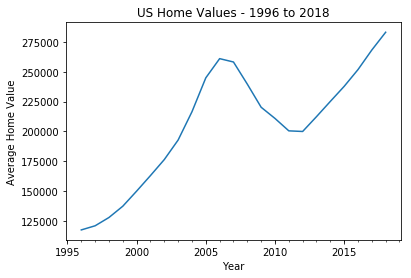

In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Calculate average price for US houses for each year
M96 = Hdf.iloc[:,6:15].mean(axis=1).mean()
M97 = Hdf.iloc[:,15:27].mean(axis=1).mean()
M98 = Hdf.iloc[:,27:39].mean(axis=1).mean()
M99 = Hdf.iloc[:,39:51].mean(axis=1).mean()
M00 = Hdf.iloc[:,51:63].mean(axis=1).mean()
M01 = Hdf.iloc[:,63:75].mean(axis=1).mean()
M02 = Hdf.iloc[:,75:87].mean(axis=1).mean()
M03 = Hdf.iloc[:,87:99].mean(axis=1).mean()
M04 = Hdf.iloc[:,99:111].mean(axis=1).mean()
M05 = Hdf.iloc[:,111:123].mean(axis=1).mean()
M06 = Hdf.iloc[:,123:135].mean(axis=1).mean()
M07 = Hdf.iloc[:,135:147].mean(axis=1).mean()
M08 = Hdf.iloc[:,147:159].mean(axis=1).mean()
M09 = Hdf.iloc[:,159:171].mean(axis=1).mean()
M10 = Hdf.iloc[:,171:183].mean(axis=1).mean()
M11 = Hdf.iloc[:,183:195].mean(axis=1).mean()
M12 = Hdf.iloc[:,195:207].mean(axis=1).mean()
M13 = Hdf.iloc[:,207:219].mean(axis=1).mean()
M14 = Hdf.iloc[:,219:231].mean(axis=1).mean()
M15 = Hdf.iloc[:,231:243].mean(axis=1).mean()
M16 = Hdf.iloc[:,243:255].mean(axis=1).mean()
M17 = Hdf.iloc[:,255:267].mean(axis=1).mean()
M18 = Hdf.iloc[:,267:].mean(axis=1).mean()

#Condense average values into dataframe
AnnualAvg = pd.DataFrame({'1996': M96,
                          '1997': M97,
                          '1998': M98,
                          '1999': M99,
                          '2000': M00,
                          '2001': M01,
                          '2002': M02,
                          '2003': M03,
                          '2004': M04,
                          '2005': M05,
                          '2006': M06,
                          '2007': M07,
                          '2008': M08,
                          '2009': M09,
                          '2010': M10,
                          '2011': M11,
                          '2012': M12,
                          '2013': M13,
                          '2014': M14,
                          '2015': M15,
                          '2016': M16,
                          '2017': M17,
                          '2018': M18},
                         index=[0])

AnnualAvg = AnnualAvg.transpose()
AnnualAvg.index = pd.to_datetime(AnnualAvg.index)
AnnualAvg = AnnualAvg.rename(columns = {0:'Average Home Value'})
AnnualAvg.plot(legend=None)
pyplot.title('US Home Values - 1996 to 2018')
pyplot.xlabel('Year')
pyplot.ylabel('Average Home Value')
pyplot.show()


The recession and recovery has not been equally distributed across the US and has occurred at different rates. To illustrate this, I’ll show the average housing prices for four metro areas in Arkansas: Hot Springs, Little Rock, Fayetteville and Searcy.

In [9]:
#Create function that generates metro time series
def TSMetro(Metro):
    HS = Hdf.loc[Hdf['Metro'] == Metro] #Select metro
    HSavg = HS[CondyearList].mean() #Calculate mean for each year (referencing CondyearList)
    HSdf = HSavg.to_frame() #Convert series to dataframe
    HSdf.columns = [Metro] #Create name for column
    HSdf.index = pd.to_datetime(HSdf.index) #Convert index to date
    return(HSdf)

#Run function for each metro
HS = TSMetro('Hot Springs') 
LR = TSMetro('Little Rock')
FV = TSMetro('Fayetteville')
SC = TSMetro('Searcy')

#Merge all dataframes into one
Ark1 = HS.join(LR, how='outer') #Merge HS and TS
Ark2 = Ark1.join(FV, how='outer') #Merge FV to HS/TS
ArkMetros = Ark2.join(SC, how='outer') #Merge SC to HS/TS/FV
ArkMetros.head()

,Hot Springs,Little Rock,Fayetteville,Searcy
1997-01-01,72225.0,86772.413793,79572.222222,62180.0
1997-02-01,72275.0,87306.896552,80025.000000,62440.0
1997-03-01,72400.0,87841.379310,80458.333333,62680.0
1997-04-01,72575.0,88410.344828,80836.111111,62960.0
1997-05-01,72825.0,88948.275862,81108.333333,63220.0


This time series of Arkansas home prices highlights a few things when compared to the US average home price time series shown previously. First, home prices in Arkansas are well below the national average, even at their peak. Second, you can see the impact of the Great Recession in Arkansas was minimal compared to the national average. Lastly, you see the impact of the recession and the recovery afterwards was different for individual communities. Fayetteville saw decreases in home values during this period, but others just saw periods of little to no growth. 

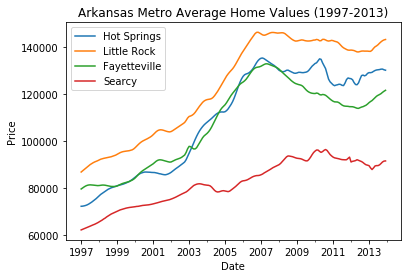

In [10]:
#Plot time series for all four Arkansas metros
ArkMetros.plot()
pyplot.title('Arkansas Metro Average Home Values (1997-2013)')
pyplot.xlabel('Date')
pyplot.ylabel('Price')
pyplot.show()

In [11]:
Hts = Hdf.drop(['City','State','Metro','CountyName','SizeRank'], axis=1)

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Hdf['96_Mean'] = Hdf.iloc[:,6:15].mean(axis=1)
Hdf['97_Mean'] = Hdf.iloc[:,15:27].mean(axis=1)
Hdf['98_Mean'] = Hdf.iloc[:,27:39].mean(axis=1)
Hdf['99_Mean'] = Hdf.iloc[:,39:51].mean(axis=1)
Hdf['00_Mean'] = Hdf.iloc[:,51:63].mean(axis=1)
Hdf['01_Mean'] = Hdf.iloc[:,63:75].mean(axis=1)
Hdf['02_Mean'] = Hdf.iloc[:,75:87].mean(axis=1)
Hdf['03_Mean'] = Hdf.iloc[:,87:99].mean(axis=1)
Hdf['04_Mean'] = Hdf.iloc[:,99:111].mean(axis=1)
Hdf['05_Mean'] = Hdf.iloc[:,111:123].mean(axis=1)
Hdf['06_Mean'] = Hdf.iloc[:,123:135].mean(axis=1)
Hdf['07_Mean'] = Hdf.iloc[:,135:147].mean(axis=1)
Hdf['08_Mean'] = Hdf.iloc[:,147:159].mean(axis=1)
Hdf['09_Mean'] = Hdf.iloc[:,159:171].mean(axis=1)
Hdf['10_Mean'] = Hdf.iloc[:,171:183].mean(axis=1)
Hdf['11_Mean'] = Hdf.iloc[:,183:195].mean(axis=1)
Hdf['12_Mean'] = Hdf.iloc[:,195:207].mean(axis=1)
Hdf['13_Mean'] = Hdf.iloc[:,207:219].mean(axis=1)
Hdf['14_Mean'] = Hdf.iloc[:,219:231].mean(axis=1)
Hdf['15_Mean'] = Hdf.iloc[:,231:243].mean(axis=1)
Hdf['16_Mean'] = Hdf.iloc[:,243:255].mean(axis=1)
Hdf['17_Mean'] = Hdf.iloc[:,255:267].mean(axis=1)
#Create df for growth rate
a = Hdf[Hdf.columns[0]]
b = Hdf[Hdf.columns[-22:]]
HdfMean = pd.concat([a, b], axis=1)

HdfMean.describe()

,RegionName,96_Mean,97_Mean,98_Mean,99_Mean,00_Mean,01_Mean,02_Mean,03_Mean,04_Mean,...,08_Mean,09_Mean,10_Mean,11_Mean,12_Mean,13_Mean,14_Mean,15_Mean,16_Mean,17_Mean
count,15245.00,14146.00,14147.00,14149.00,14149.00,14149.00,14149.00,14149.00,14274.00,14329.00,...,14622.00,14638.00,14932.00,14991.00,15040.00,15132.00,15245.00,15245.00,15245.00,15245.00
mean,48010.36,117359.65,120825.93,127786.23,137251.11,149915.05,162966.40,176392.84,192790.25,216524.43,...,239683.05,220274.52,210898.72,200478.92,199953.70,212383.00,225172.06,237802.32,251864.79,268304.18
std,29121.61,86160.54,90204.96,96972.02,106814.00,124751.25,141810.52,156548.01,173473.70,218139.30,...,243189.08,232882.51,233004.18,228502.60,229191.52,252433.19,286892.32,320028.80,338242.71,354437.08
min,1001.00,11855.56,13133.33,14575.00,15591.67,16441.67,17425.00,18916.67,20633.33,20766.67,...,22608.33,20275.00,18766.67,15633.33,15491.67,15591.67,14016.67,13766.67,14666.67,14300.00
25%,22443.00,68277.78,70716.67,74900.00,79366.67,83491.67,87758.33,91516.67,96583.33,102791.67,...,117393.75,111122.92,105604.17,100416.67,98997.92,102031.25,105558.33,110491.67,116450.00,124241.67
50%,46055.00,98194.44,100216.67,105608.33,112116.67,119675.00,126625.00,133966.67,142770.83,154325.00,...,175395.83,161733.33,154141.67,146058.33,144758.33,150891.67,157050.00,162966.67,171958.33,183925.00
75%,74872.00,141900.00,144858.33,150900.00,160066.67,172683.33,187250.00,204491.67,227047.92,256916.67,...,283979.17,256154.17,242968.75,228645.83,226489.58,238739.58,251691.67,263400.00,279466.67,298358.33
max,99901.00,3791966.67,4077925.00,4066666.67,3473200.00,2968375.00,3135966.67,3582225.00,4040933.33,10346566.67,...,10556433.33,11289500.00,12825083.33,12820833.33,11135000.00,11616758.33,14297525.00,17264258.33,18729791.67,18831466.67


                 0
count    81.000000
mean   2567.289268
std    3194.845968
min   -6696.048818
25%    -291.534188
50%    3953.411953
75%    4714.724718
max    6833.711350
RMSE: 4083.136


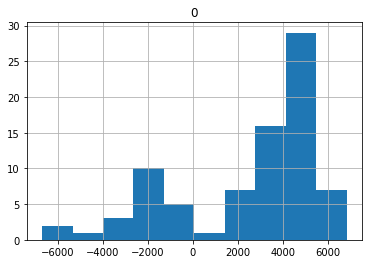

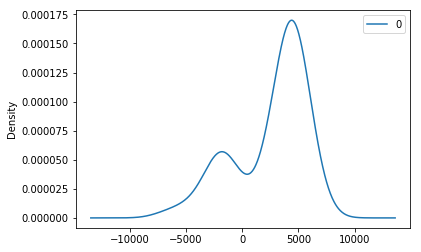

In [272]:
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# plot
residuals.hist(ax=pyplot.gca())
pyplot.show()

residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

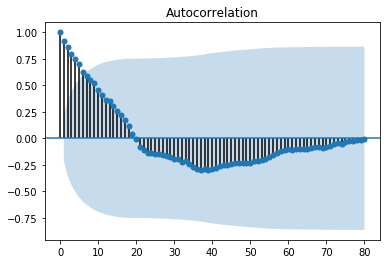

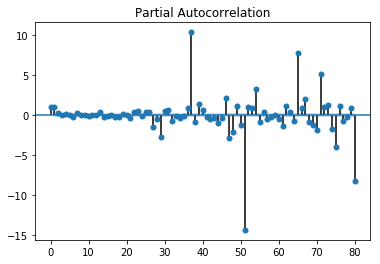

In [273]:
# LOOK AT ACF AND PACF FOR RESIDUALS
plot_acf(residuals, ax=pyplot.gca())
pyplot.show()

plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [195]:
# CREATE TRAIN-TEST DATA
# Train = 1996 to 2013
# Test = Jan - Mar 2014
EdmondTrain = EdmondZip[:213]
EdmondTest = EdmondZip[213:216]
EdmondTest

,Median Home Value
variable,
2014-01-01,145400.0
2014-02-01,145600.0
2014-03-01,145800.0


## Narrowing Down Zip Codes

With a better understanding of the dataset, I can now narrow down the list of zip codes. As mentioned previously, we’re only interested in the zip codes that further our research goal of determining the best real estate investment opportunities. The best opportunities have a high rate of growth and minimized risk. In investing, risk is attributed to high variability and uncertainty. To mitigate risk, we will identify zip codes that have below average loan-to-value ratios and are not within close proximity to one another. Zip codes in the same market are likely to share similar trends, therefore diversifying our investments in multiple areas of the US helps ensure that our entire portfolio isn’t impacted with market-level economic shocks.

### Minimizing Risk: Loan-to-Value Ration

In this analysis, I used the average Loan-to-Value (LTV) ratio to determine risk. Very few individuals have the upfront cash to purchase real estate outright, and therefore purchase the home with a down payment while financing the rest. The down payment on a home typically ranges from 5% to 20% of the total cost.3 This ratio of down payment and financing makes up the LTV, and illustrates how individuals earn or lose so much money in real estate. For example, if an investor has $100,000 to spend on real estate investment opportunities they could choose:

Investment A: $100,000 home (0% financed) 
Investment B: $500,000 home (80% financed).  

If the housing market booms and prices appreciate by 5%, the investor would have earned $5,000 on Investment A or $25,000 on Investment B. Investment B sounds pretty attractive considering the investor only had $100,000 to begin with! However, if housing prices had depreciated by 5% the investments would have lost those same amounts. This illustrates how someone who has taken too much risk can suddenly find themselves owing more than the home is worth. Balancing this opportunity and risk is an important part of real estate investment decision-making. At a macroeconomic level, a market full of homeowners with high LTV ratios is hit much harder by economic shocks than a market with homeowners with low LTV ratios. The high LTV ratio market would see a much more drastic decrease in housing demand, leading to further depreciation of prices.4

We're assuming the real estate investor is a risk-averse organization, so our recommendation is to avoid zip codes with an average LTV ratio of .75 or greater. 


### Acquiring and Processing LTV Data

Community-level LTV ratios was sourced from the Federal Housing Finance Agency website.5 The dataset included sampled historical data of home transactions in the US. However, the dataset required some data wrangling to be useful for our analysis. Each observation of the dataset was one instance of a home being purchased with information about the transaction including house characteristics, loan information and buyer and seller characteristics totalling 55,991 transactions. The only geographic information provided was the Metropolitan Statistical Area (MSA).

The dataset was imported into Python, the average LTV for each MSA was calculated and only the variables of interest were retained. Next, a dataset from the U.S. Department of Housing and Urban Development (HUD) was imported and used as a dictionary to translate the MSA values to zip codes. The datasets were then merged and the zip codes with an average LTV ratio of .75 or greater were isolated. The final dataframe is shown below:

An important note is that multiple zip codes are contained in an instance of an MSA, meaning their average LTVs are equivalent. The MSA will help more quickly narrow down our zip codes and ensure they are not in close proximity. The .75 LTV threshold narrowed our zip codes down by to 10,346.

In [44]:
#Source: https://www.fhfa.gov/DataTools/Downloads/Pages/FHLBank-Public-Use-Database-Previous-Years.aspx

def impLTV(LTVfile):
    LTV17 = pd.read_csv(LTVfile, sep=",", index_col=0)
    LTV17 = LTV17[['FIPSStateCode','MSA','LTV']]
    LTV17 = LTV17[LTV17.MSA != 99999]
    grouped_LTV = LTV17.groupby(['MSA'])
    grouped_LTV = grouped_LTV['LTV'].mean().reset_index()
    return(grouped_LTV)

LTV17 = impLTV("2017_PUDB_Export.csv")

In [45]:
#Source: https://www.huduser.gov/portal/datasets/usps_crosswalk.html

#Import MSA-to-Zip table
MSAdf = pd.read_csv("ZIP_CBSA_062018.csv", sep=",")
MSAdf = MSAdf[['zip','cbsa']]
MSAdf = MSAdf[MSAdf.cbsa != 99999]

In [46]:
# Merge MSA-to-zip table and Average LTV table
LTVMerged = MSAdf.merge(LTV17, 
                        left_on='cbsa', 
                        right_on='MSA', 
                        how='inner',
                        suffixes=["","_matched"]
                       )

In [64]:
#Filter dataset by a loan-to-value ratio of 75% or less 
LTVC = LTVMerged.loc[LTVMerged['LTV'] < .75]
LTVC = LTVC.reset_index()
LTVC = LTVC[['zip','cbsa','MSA','LTV']]
LTVC.describe()

,zip,cbsa,MSA,LTV
count,10346.00,10346.00,10346.00,10346.00
mean,53320.53,31086.56,31086.56,0.71
std,33161.94,10060.40,10060.40,0.05
min,501.00,10300.00,10300.00,0.17
25%,19373.25,21840.00,21840.00,0.70
50%,48452.00,34620.00,34620.00,0.72
75%,90078.75,39140.00,39140.00,0.73
max,99790.00,49300.00,49300.00,0.75


## Identiying Opportunity: Population Growth

I used population data from the US Census to identify metropolitan areas that show the greatest opportunity for growth.6  This data included annual population estimates for each MSA since 2010. The first step was to merge the population and LTV datasets so that only the metros that meet our risk threshold are considered. Next, the growth rate was calculated based on the previous year.

While population growth is important, the rate of growth can’t be the only factor. A town with a population of 100 doubling cannot be compared to a city of 10,000,000 doubling. To help achieve a balance between population growth and overall size, the median growth rate was divided by the most recent population estimate to provide a ratio that can more equally compare metros. The data was then sorted with the highest to lowest metros and the top 6 metros were displayed:



In [65]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=PEP_2017_PEPANNRES&prodType=table

Popdf = pd.read_csv("MSA_Pop.csv", sep=",")
Popdf.head()

# Merge MSA-to-zip table and Average LTV table
LTVC_Pop = LTVC.merge(Popdf, 
                        left_on='MSA', 
                        right_on='Id2', 
                        how='left',
                        suffixes=["","_matched"]
                       )
LTVC_Pop = LTVC_Pop.dropna()

In [66]:
#Calculate annual growth rate 
LTVC_Pop['10-11'] = (LTVC_Pop['2011'] - LTVC_Pop['2010'])/LTVC_Pop['2010']
LTVC_Pop['11-12'] = (LTVC_Pop['2012'] - LTVC_Pop['2011'])/LTVC_Pop['2011']
LTVC_Pop['12-13'] = (LTVC_Pop['2013'] - LTVC_Pop['2012'])/LTVC_Pop['2012']
LTVC_Pop['13-14'] = (LTVC_Pop['2014'] - LTVC_Pop['2013'])/LTVC_Pop['2013']
LTVC_Pop['14-15'] = (LTVC_Pop['2015'] - LTVC_Pop['2014'])/LTVC_Pop['2014']
LTVC_Pop['15-16'] = (LTVC_Pop['2016'] - LTVC_Pop['2015'])/LTVC_Pop['2015']
LTVC_Pop['16-17'] = (LTVC_Pop['2017'] - LTVC_Pop['2016'])/LTVC_Pop['2016']

LTVC_Pop.head()

,zip,cbsa,MSA,LTV,Id2,Geography,2010,2011,2012,2013,...,2015,2016,2017,10-11,11-12,12-13,13-14,14-15,15-16,16-17
0,1463,14460,14460,0.71,14460.00,"Boston-Cambridge-Newton, MA-NH Metro Area",4565220.00,4608303.00,4653023.00,4699912.00,...,4775755.00,4805942.00,4836531.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,1719,14460,14460,0.71,14460.00,"Boston-Cambridge-Newton, MA-NH Metro Area",4565220.00,4608303.00,4653023.00,4699912.00,...,4775755.00,4805942.00,4836531.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2,1773,14460,14460,0.71,14460.00,"Boston-Cambridge-Newton, MA-NH Metro Area",4565220.00,4608303.00,4653023.00,4699912.00,...,4775755.00,4805942.00,4836531.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01
3,1778,14460,14460,0.71,14460.00,"Boston-Cambridge-Newton, MA-NH Metro Area",4565220.00,4608303.00,4653023.00,4699912.00,...,4775755.00,4805942.00,4836531.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01
4,1851,14460,14460,0.71,14460.00,"Boston-Cambridge-Newton, MA-NH Metro Area",4565220.00,4608303.00,4653023.00,4699912.00,...,4775755.00,4805942.00,4836531.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [67]:
#Isolate geography and growth rates
LTVCF = LTVC_Pop.drop(['zip','cbsa','MSA','LTV','Id2','2010','2011','2012','2013','2014','2015','2016','2017'], axis=1)
LTVCF = LTVCF.groupby('Geography', as_index=False).mean()
LTVCF.head()

,Geography,10-11,11-12,12-13,13-14,14-15,15-16,16-17
0,"Albuquerque, NM Metro Area",0.01,0.00,0.00,-0.00,0.00,0.00,0.00
1,"Anchorage, AK Metro Area",0.01,0.01,0.01,0.00,0.00,0.01,-0.00
2,"Bangor, ME Metro Area",-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,0.00
3,"Barnstable Town, MA Metro Area",-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
4,"Bloomington, IN Metro Area",0.01,0.01,0.00,0.01,0.00,0.01,0.01


In [68]:
#Calculate median for each metro
LTVCF['MedianGR'] = LTVCF.median(axis=1)

#Filter metros by top only quartile median growth rate = .011623
LTVCF = LTVCF.loc[LTVCF['MedianGR'] > .011623]

In [69]:
#Bring back in 2017 populations for top growing metros 
MergePop = LTVC_Pop[['Geography','2017']]
LTVCF = LTVCF.merge(MergePop, 
                        left_on='Geography', 
                        right_on='Geography', 
                        how='left',
                        suffixes=["","_matched"]
                       )

#Calculate ratio of population and growth rate
LTVCF = LTVCF.groupby('Geography', as_index=False).mean()
LTVCF['Pop_GR_Ratio'] = LTVCF['2017'] / LTVCF['MedianGR']

#Sort by best ratios of high population and high growth rate
LTVCF = LTVCF.sort_values(by=['Pop_GR_Ratio'], ascending=False)

#Select top 6 metros with high populations and growth rates
LTVCF = LTVCF.iloc[0:6]
LTVCF

,Geography,10-11,11-12,12-13,13-14,14-15,15-16,16-17,MedianGR,2017,Pop_GR_Ratio
17,"San Francisco-Oakland-Hayward, CA Metro Area",0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,4727357.00,350313000.23
12,"Phoenix-Mesa-Scottsdale, AZ Metro Area",0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,4737270.00,259514290.71
19,"Seattle-Tacoma-Bellevue, WA Metro Area",0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,3867046.00,235376938.69
16,"Sacramento--Roseville--Arden-Arcade, CA Metro ...",0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,2324884.00,198767120.88
3,"Columbus, OH Metro Area",0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,2078725.00,167929855.42
5,"Denver-Aurora-Lakewood, CO Metro Area",0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.02,2888227.00,161392860.75


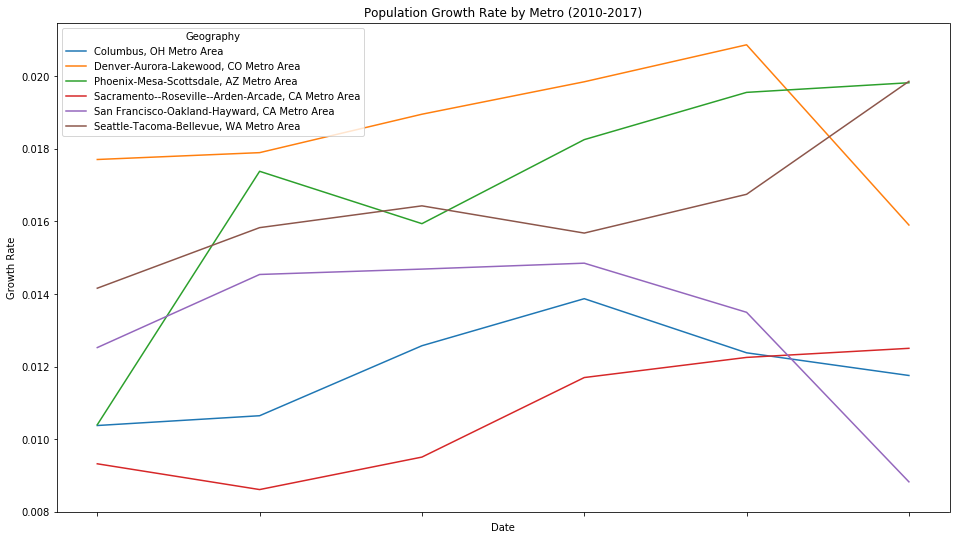

In [72]:
#Select just the growth rate and metro name
GraphLTVCF = LTVCF.iloc[:,:7]

#Melt and pivot dataframe 
GraphLTVCF = pd.melt(GraphLTVCF,id_vars=['Geography'])
GraphLTVCF = GraphLTVCF.pivot(index='variable', columns='Geography', values='value')

#Plot growth rate for all 6 metros
from matplotlib.pyplot import figure
pyplot.rcParams["figure.figsize"] = [16,9]
GraphLTVCF.plot()
pyplot.title('Population Growth Rate by Metro (2010-2017)')
pyplot.xlabel('Date')
pyplot.ylabel('Growth Rate')
pyplot.show()

In [73]:
#Clean Population dataset with just relevant metros and columns
topmetros = ['Phoenix-Mesa-Scottsdale, AZ Metro Area','Seattle-Tacoma-Bellevue, WA Metro Area','Sacramento--Roseville--Arden-Arcade, CA Metro Area']
relcol = ['zip','MSA','Geography','2010','2011','2012','2013','2014','2015','2016','2017']

LTVC_Pop = LTVC_Pop.loc[LTVC_Pop['Geography'].isin(topmetros)]
LTVC_Pop = LTVC_Pop.loc[:,relcol]


,zip,MSA,Geography,2010,2011,2012,2013,2014,2015,2016,2017
6328,85016,38060,"Phoenix-Mesa-Scottsdale, AZ Metro Area",4204148.00,4247852.00,4321686.00,4390565.00,4470712.00,4558145.00,4648498.00,4737270.00
6329,85012,38060,"Phoenix-Mesa-Scottsdale, AZ Metro Area",4204148.00,4247852.00,4321686.00,4390565.00,4470712.00,4558145.00,4648498.00,4737270.00
6330,85262,38060,"Phoenix-Mesa-Scottsdale, AZ Metro Area",4204148.00,4247852.00,4321686.00,4390565.00,4470712.00,4558145.00,4648498.00,4737270.00
6331,85312,38060,"Phoenix-Mesa-Scottsdale, AZ Metro Area",4204148.00,4247852.00,4321686.00,4390565.00,4470712.00,4558145.00,4648498.00,4737270.00
6332,85275,38060,"Phoenix-Mesa-Scottsdale, AZ Metro Area",4204148.00,4247852.00,4321686.00,4390565.00,4470712.00,4558145.00,4648498.00,4737270.00
6333,85353,38060,"Phoenix-Mesa-Scottsdale, AZ Metro Area",4204148.00,4247852.00,4321686.00,4390565.00,4470712.00,4558145.00,4648498.00,4737270.00
6334,85378,38060,"Phoenix-Mesa-Scottsdale, AZ Metro Area",4204148.00,4247852.00,4321686.00,4390565.00,4470712.00,4558145.00,4648498.00,4737270.00
6335,85193,38060,"Phoenix-Mesa-Scottsdale, AZ Metro Area",4204148.00,4247852.00,4321686.00,4390565.00,4470712.00,4558145.00,4648498.00,4737270.00
6336,85083,38060,"Phoenix-Mesa-Scottsdale, AZ Metro Area",4204148.00,4247852.00,4321686.00,4390565.00,4470712.00,4558145.00,4648498.00,4737270.00
6337,85203,38060,"Phoenix-Mesa-Scottsdale, AZ Metro Area",4204148.00,4247852.00,4321686.00,4390565.00,4470712.00,4558145.00,4648498.00,4737270.00


In [74]:
#Create list of zipcodes
zipList = LTVC_Pop['zip'].tolist()

#Filter housing price data by zipcode list
Hdf2 = Hdf.loc[Hdf['RegionName'].isin(zipList)]

In [477]:
#Inspect how many Metros are in dataset
Hdf2['Metro'].nunique()

11

In [80]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Hdf2['96_Mean'] = Hdf2.iloc[:,6:15].mean(axis=1)
Hdf2['97_Mean'] = Hdf2.iloc[:,15:27].mean(axis=1)
Hdf2['98_Mean'] = Hdf2.iloc[:,27:39].mean(axis=1)
Hdf2['99_Mean'] = Hdf2.iloc[:,39:51].mean(axis=1)
Hdf2['00_Mean'] = Hdf2.iloc[:,51:63].mean(axis=1)
Hdf2['01_Mean'] = Hdf2.iloc[:,63:75].mean(axis=1)
Hdf2['02_Mean'] = Hdf2.iloc[:,75:87].mean(axis=1)
Hdf2['03_Mean'] = Hdf2.iloc[:,87:99].mean(axis=1)
Hdf2['04_Mean'] = Hdf2.iloc[:,99:111].mean(axis=1)
Hdf2['05_Mean'] = Hdf2.iloc[:,111:123].mean(axis=1)
Hdf2['06_Mean'] = Hdf2.iloc[:,123:135].mean(axis=1)
Hdf2['07_Mean'] = Hdf2.iloc[:,135:147].mean(axis=1)
Hdf2['08_Mean'] = Hdf2.iloc[:,147:159].mean(axis=1)
Hdf2['09_Mean'] = Hdf2.iloc[:,159:171].mean(axis=1)
Hdf2['10_Mean'] = Hdf2.iloc[:,171:183].mean(axis=1)
Hdf2['11_Mean'] = Hdf2.iloc[:,183:195].mean(axis=1)
Hdf2['12_Mean'] = Hdf2.iloc[:,195:207].mean(axis=1)
Hdf2['13_Mean'] = Hdf2.iloc[:,207:219].mean(axis=1)
Hdf2['14_Mean'] = Hdf2.iloc[:,219:231].mean(axis=1)
Hdf2['15_Mean'] = Hdf2.iloc[:,231:243].mean(axis=1)
Hdf2['16_Mean'] = Hdf2.iloc[:,243:255].mean(axis=1)
Hdf2['17_Mean'] = Hdf2.iloc[:,255:267].mean(axis=1)
#Create df for growth rate
a = Hdf2[Hdf2.columns[0]]
b = Hdf2[Hdf2.columns[-22:]]
Hdf3 = pd.concat([a, b], axis=1)

#Create 2010-2017 annual average of median housing prices
c = Hdf3[Hdf3.columns[0]]
d = Hdf3[Hdf3.columns[-8:]]
Hdf4 = pd.concat([c, d], axis=1)

/Users/coreylucero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/coreylucero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/coreylucero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [77]:
#Calculate housing growth rate
Hdf3['96-97'] = (Hdf3['97_Mean'] - Hdf3['96_Mean'])/Hdf3['96_Mean']
Hdf3['97-98'] = (Hdf3['98_Mean'] - Hdf3['97_Mean'])/Hdf3['97_Mean']
Hdf3['98-99'] = (Hdf3['99_Mean'] - Hdf3['98_Mean'])/Hdf3['98_Mean']
Hdf3['99-00'] = (Hdf3['00_Mean'] - Hdf3['99_Mean'])/Hdf3['99_Mean']
Hdf3['00-01'] = (Hdf3['01_Mean'] - Hdf3['00_Mean'])/Hdf3['00_Mean']
Hdf3['01-02'] = (Hdf3['02_Mean'] - Hdf3['01_Mean'])/Hdf3['01_Mean']
Hdf3['02-03'] = (Hdf3['03_Mean'] - Hdf3['02_Mean'])/Hdf3['02_Mean']
Hdf3['03-04'] = (Hdf3['04_Mean'] - Hdf3['03_Mean'])/Hdf3['03_Mean']
Hdf3['04-05'] = (Hdf3['05_Mean'] - Hdf3['04_Mean'])/Hdf3['04_Mean']
Hdf3['05-06'] = (Hdf3['06_Mean'] - Hdf3['05_Mean'])/Hdf3['05_Mean']
Hdf3['06-07'] = (Hdf3['07_Mean'] - Hdf3['06_Mean'])/Hdf3['06_Mean']
Hdf3['07-08'] = (Hdf3['08_Mean'] - Hdf3['07_Mean'])/Hdf3['07_Mean']
Hdf3['08-09'] = (Hdf3['09_Mean'] - Hdf3['08_Mean'])/Hdf3['08_Mean']
Hdf3['09-10'] = (Hdf3['10_Mean'] - Hdf3['09_Mean'])/Hdf3['09_Mean']
Hdf3['10-11'] = (Hdf3['11_Mean'] - Hdf3['10_Mean'])/Hdf3['10_Mean']
Hdf3['11-12'] = (Hdf3['12_Mean'] - Hdf3['11_Mean'])/Hdf3['11_Mean']
Hdf3['12-13'] = (Hdf3['13_Mean'] - Hdf3['12_Mean'])/Hdf3['12_Mean']
Hdf3['13-14'] = (Hdf3['14_Mean'] - Hdf3['13_Mean'])/Hdf3['13_Mean']
Hdf3['14-15'] = (Hdf3['15_Mean'] - Hdf3['14_Mean'])/Hdf3['14_Mean']
Hdf3['15-16'] = (Hdf3['16_Mean'] - Hdf3['15_Mean'])/Hdf3['15_Mean']
Hdf3['16-17'] = (Hdf3['17_Mean'] - Hdf3['16_Mean'])/Hdf3['16_Mean']

a = Hdf3[Hdf3.columns[0]]
b = Hdf3[Hdf3.columns[-7:]]
HdfGR = pd.concat([a, b], axis=1)

#Calculate median for each metro
HdfGR['MedianGR'] = HdfGR.median(axis=1)

#Filter out zipcodes in the bottom quartile
HdfGR = HdfGR.loc[HdfGR['MedianGR'] > .08]

#Sort by best ratios of high population and high growth rate
HdfGR = HdfGR.sort_values(by=['MedianGR'], ascending=False)

#Bring back in 2017 populations for top growing metros 
c = Hdf2[['RegionName','City','State','Metro']]
HdfGR = HdfGR.merge(c, 
                        left_on='RegionName', 
                        right_on='RegionName', 
                        how='left',
                        suffixes=["","_matched"]
                       )

In [ ]:
####FINAL ZIP CODES FOR MODEL BUILDING####

#Sacramento = 95824 (Sacramento); #95820 (Sacramento)
#Seattle = 98168 (Burien); 98106 (Seattle)
#Phoenix = 85008 (Phoenix); 85335 (El Mirage)

In [700]:
#Create Hdf of 2010-2017 annual averages of median housing prices for each zip code
Sac1Hdf = Hdf4.loc[Hdf4['RegionName'] == 95824]
Sac2Hdf = Hdf4.loc[Hdf4['RegionName'] == 95820]
Sea1Hdf = Hdf4.loc[Hdf4['RegionName'] == 98168]
Sea2Hdf = Hdf4.loc[Hdf4['RegionName'] == 98106]
Pho1Hdf = Hdf4.loc[Hdf4['RegionName'] == 85008]
Pho2Hdf = Hdf4.loc[Hdf4['RegionName'] == 85335]

Sac1Hdf


,RegionName,10_Mean,11_Mean,12_Mean,13_Mean,14_Mean,15_Mean,16_Mean,17_Mean
RegionID,,,,,,,,,
98433,95824,88133.33,86400.00,77600.00,107958.33,137708.33,150075.00,178608.33,208258.33


In [701]:
#Create population time series for each zip code
relcol = ['zip','2010','2011','2012','2013','2014','2015','2016','2017']
LTVC_Pop = LTVC_Pop.loc[:,relcol]
Sac1Pop = LTVC_Pop.loc[LTVC_Pop['zip'] == 95824]
Sac2Pop = LTVC_Pop.loc[LTVC_Pop['zip'] == 95820]
Sea1Pop = LTVC_Pop.loc[LTVC_Pop['zip'] == 98168]
Sea2Pop = LTVC_Pop.loc[LTVC_Pop['zip'] == 98106]
Pho1Pop = LTVC_Pop.loc[LTVC_Pop['zip'] == 85008]
Pho2Pop = LTVC_Pop.loc[LTVC_Pop['zip'] == 85335]

Sac1Pop

,zip,2010,2011,2012,2013,2014,2015,2016,2017
8848,95824,2153935.00,2174008.00,2192724.00,2213564.00,2239455.00,2266892.00,2295233.00,2324884.00


In [706]:
#Combine housing and population dataframes
def TS(Hdf,Pop):
    Hdf=Hdf.rename(columns = {'10_Mean':'2010', '11_Mean':'2011','12_Mean':'2012','13_Mean':'2013','14_Mean':'2014','15_Mean':'2015','16_Mean':'2016','17_Mean':'2017'})
    Hdf = pd.melt(Hdf, id_vars='RegionName')
    Hdf['variable'] = pd.to_datetime(Hdf['variable'])
    Hdf=Hdf.rename(columns = {'value':'Average Housing Price'})
    
    Pop = pd.melt(Pop, id_vars='zip')
    Pop['variable'] = pd.to_datetime(Pop['variable'])
    Pop=Pop.rename(columns = {'value':'Average Population'})
    
    Merge1 = Hdf.join(Pop, how='outer', lsuffix = '_a', rsuffix = '_b')
    Merge1 = Merge1[['variable_a','Average Housing Price','Average Population']]
    Merge1.set_index('variable_a',inplace=True)
    return(Merge1)
    
Sac1Clean = TS(Sac1Hdf,Sac1Pop)
Sac2Clean = TS(Sac2Hdf,Sac2Pop)
Sea1Clean = TS(Sea1Hdf,Sea1Pop)
Sea2Clean = TS(Sea2Hdf,Sea2Pop)
Pho1Clean = TS(Pho1Hdf,Pho1Pop)
Pho2Clean = TS(Pho2Hdf,Pho2Pop)


In [ ]:
######################################
##### Explore and Transform Data #####
######################################

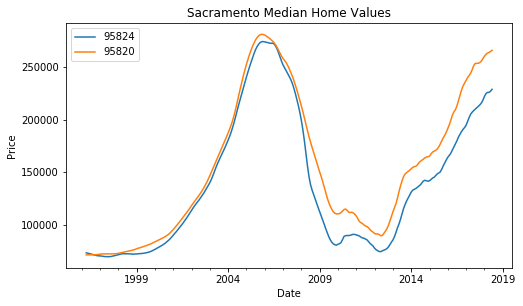

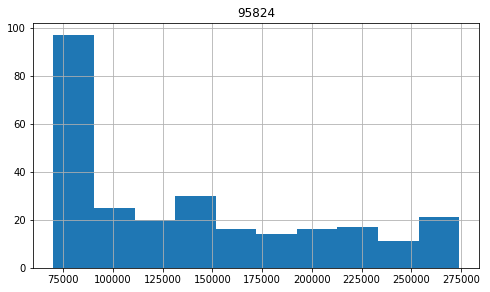

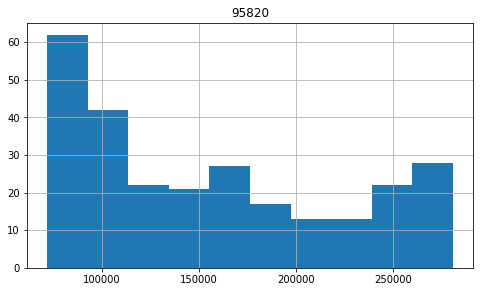

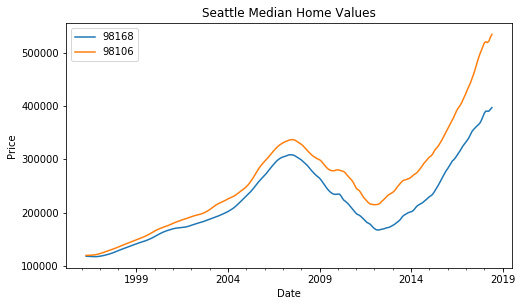

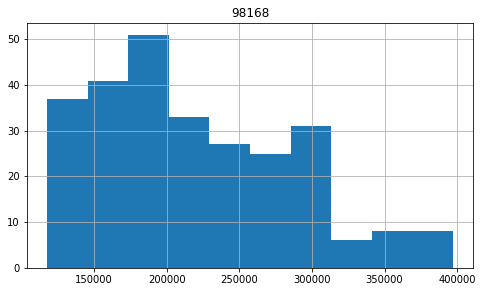

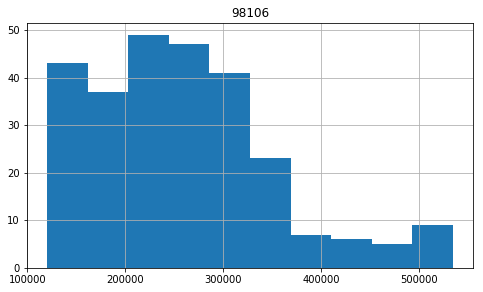

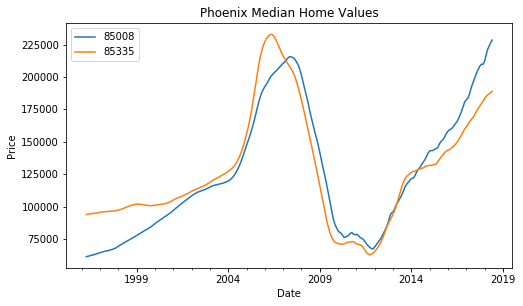

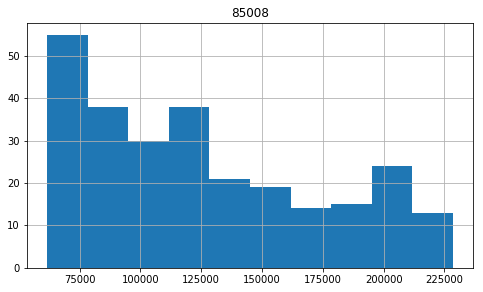

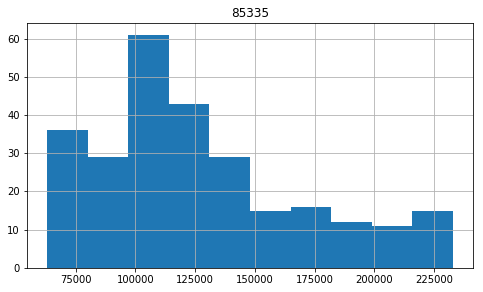

In [91]:
def ZipTS(Zip1, Zip2, PlotTitle):
    SacZip1 = Hts.loc[Hts['RegionName'] == Zip1]
    SacZip1 = pd.melt(SacZip1, id_vars='RegionName')
    SacZip1 = SacZip1.drop(['RegionName'],axis=1)
    SacZip1['variable'] = pd.to_datetime(SacZip1['variable'])
    SacZip1=SacZip1.rename(columns = {'value':'Median Home Value'})
    
    SacZip2 = Hts.loc[Hts['RegionName'] == Zip2]
    SacZip2 = pd.melt(SacZip2, id_vars='RegionName')
    SacZip2 = SacZip2.drop(['RegionName'],axis=1)
    SacZip2['variable'] = pd.to_datetime(SacZip2['variable'])
    SacZip2=SacZip2.rename(columns = {'value':'Median Home Value'})
    
    Merge1 = SacZip1.join(SacZip2, how='outer', lsuffix = '_a', rsuffix = '_b')
    Merge1 = Merge1[['Median Home Value_a','variable_a','Median Home Value_b']]
    Merge1.columns = [Zip1, 'variable', Zip2]
    
    #Plot time series for both zipcodes
    pyplot.rcParams["figure.figsize"] = [8,4.5]
    Merge1.plot(x='variable')
    pyplot.title(PlotTitle)
    pyplot.xlabel('Date')
    pyplot.ylabel('Price')
    pyplot.show()
    
    #Plot histogram
    SacZip1.hist()
    pyplot.title(Zip1)
    pyplot.show()
    
    SacZip2.hist()
    pyplot.title(Zip2)
    pyplot.show()
    
ZipTS(95824, 95820, 'Sacramento Median Home Values')
ZipTS(98168, 98106, 'Seattle Median Home Values')
ZipTS(85008, 85335, 'Phoenix Median Home Values')

In [92]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Create a difference function
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

#Create formatting function
def formatZip(Zip):
    Zip1 = Hts.loc[Hts['RegionName'] == Zip]
    Zip1 = pd.melt(Zip1, id_vars='RegionName')
    Zip1 = Zip1.drop(['RegionName'],axis=1)
    Zip1['variable'] = pd.to_datetime(Zip1['variable'])
    Zip1=Zip1.rename(columns = {'value':'Median Home Value'})
    Zip1.set_index('variable', inplace=True)
    return(Zip1)

#Create stationary function that applies difference function and plots
def stationary(Zip1):
    X = Zip1.values
    X = X.astype('float64')
    # difference data
    months_in_year = 12
    stationary = difference(X, months_in_year)
    stationary = stationary.astype('float64')
    stationary.index = Zip1.index[months_in_year:]
    # check if stationary
    result = adfuller(stationary)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
    # plot
    stationary.plot()
    pyplot.show()
    
    #Plot autocorrelation
    plot_acf(stationary, ax=pyplot.gca())
    pyplot.show()
    
    #Plot partial autocorrelation
    plot_pacf(stationary, ax=pyplot.gca())
    pyplot.show()
    
    
    
Sacramento1 = formatZip(95824)
Sacramento2 = formatZip(95820)
Seattle1 = formatZip(98168)
Seattle2 = formatZip(98106)
Phoenix1 = formatZip(85008)
Phoenix2 = formatZip(85335)

In [93]:
#Create differencing x2 function
def stationary2(Zip1):
    #Difference once
    X = Zip1.values
    X = X.astype('float64')
    # difference data
    months_in_year = 12
    stationary3 = difference(X, months_in_year)
    stationary3 = stationary3.astype('float64')
    stationary3.index = Zip1.index[months_in_year:]
    # check if stationary
    result = adfuller(stationary3)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    #Difference a second time
    stationary4 = difference(stationary3, months_in_year)
    stationary4 = stationary4.astype('float64')
    stationary4.index = stationary3.index[months_in_year:]
    # check if stationary
    result = adfuller(stationary4)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    # plot 
    stationary4.plot()
    pyplot.show()
    
    #Plot autocorrelation
    plot_acf(stationary4, ax=pyplot.gca())
    pyplot.show()
    
    #Plot partial autocorrelation
    plot_pacf(stationary4, ax=pyplot.gca())
    pyplot.show()

ADF Statistic: -2.198278
p-value: 0.206871
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
ADF Statistic: -3.664582
p-value: 0.004640
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


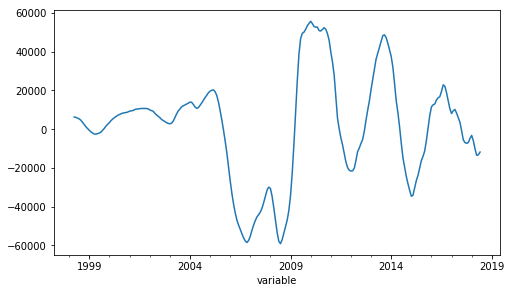

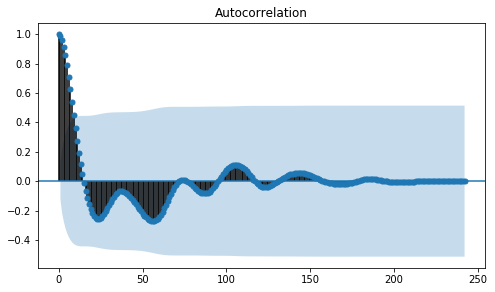

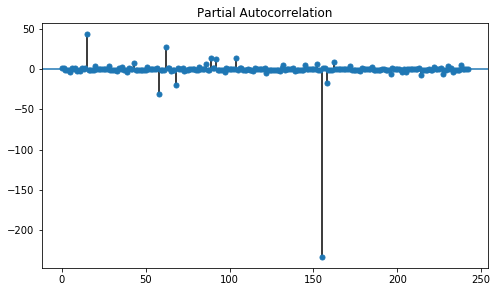

In [606]:
#Differencing once wasn't enough, used Differencing x2 function
stationary2(Sacramento1)

ADF Statistic: -2.164695
p-value: 0.219308
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
ADF Statistic: -3.248290
p-value: 0.017354
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


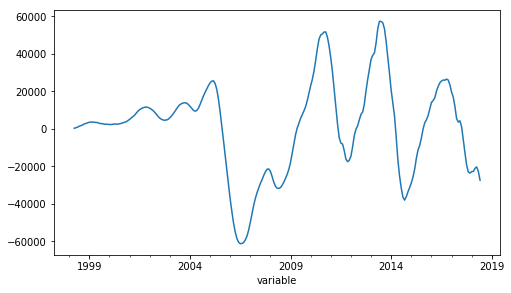

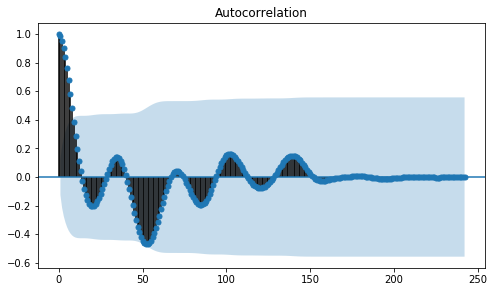

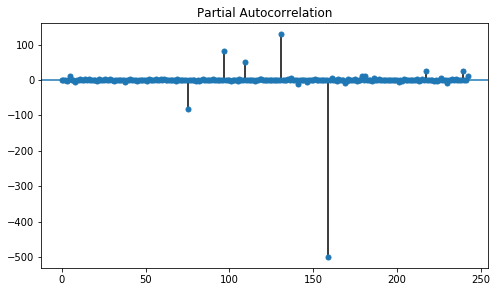

In [607]:
#Differencing once wasn't enough, used Differencing x2 function
stationary2(Sacramento2)

ADF Statistic: -2.006678
p-value: 0.283653
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
ADF Statistic: -2.674914
p-value: 0.078481
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


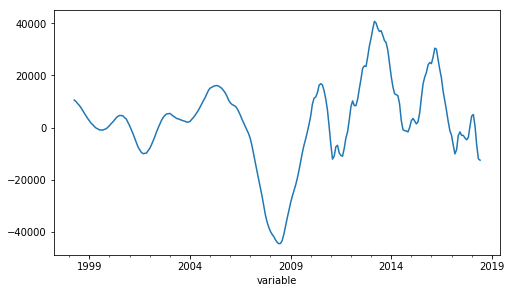

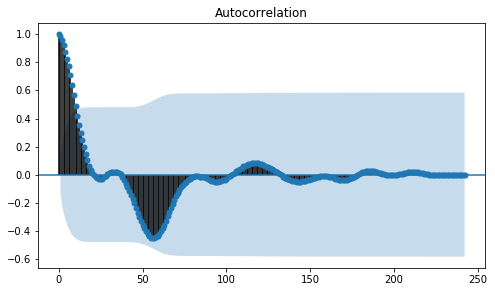

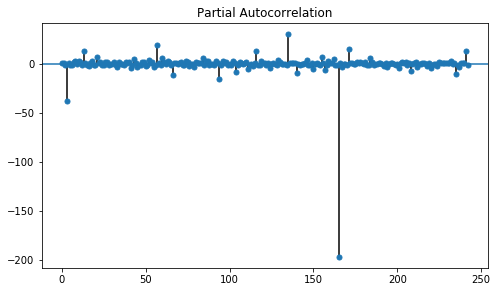

In [608]:
#Differencing once wasn't enough, used Differencing x2 function
stationary2(Seattle1)

ADF Statistic: -1.600268
p-value: 0.483459
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
ADF Statistic: -3.508106
p-value: 0.007781
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


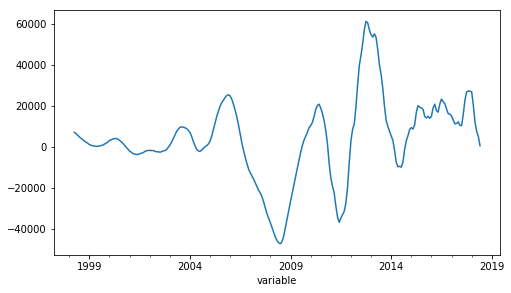

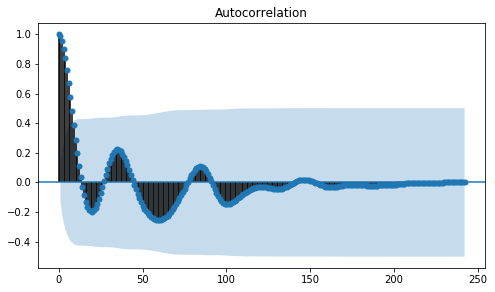

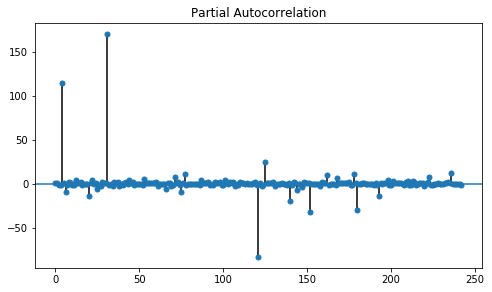

In [609]:
#Differencing once wasn't enough, used Differencing x2 function
stationary2(Seattle2)

ADF Statistic: -3.042749
p-value: 0.031091
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


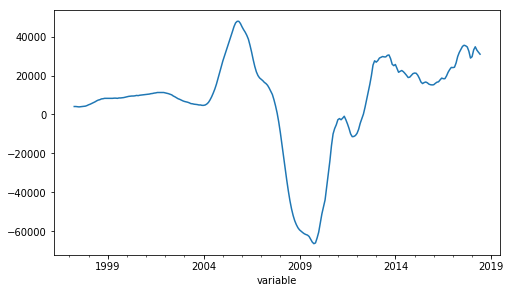

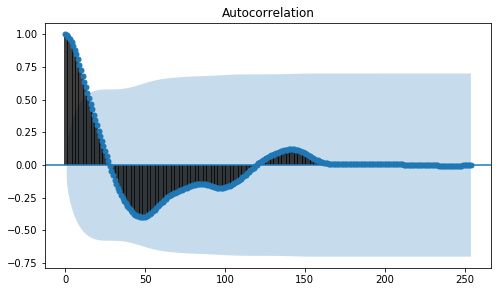

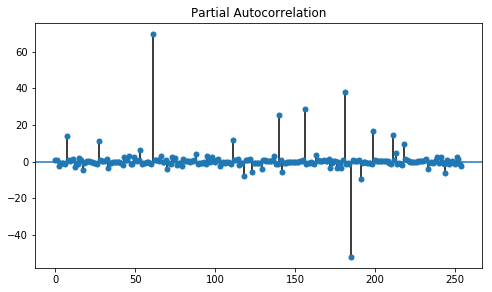

In [613]:
#Differencing once was enough to achieve stationarity
stationary(Phoenix1)

ADF Statistic: -2.629793
p-value: 0.086995
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
ADF Statistic: -3.258562
p-value: 0.016835
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


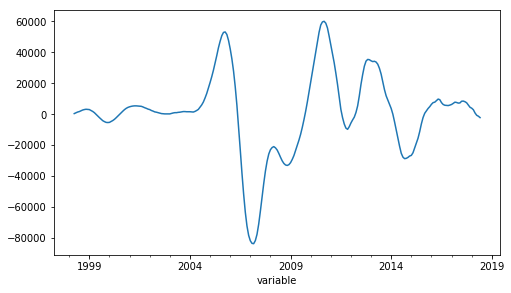

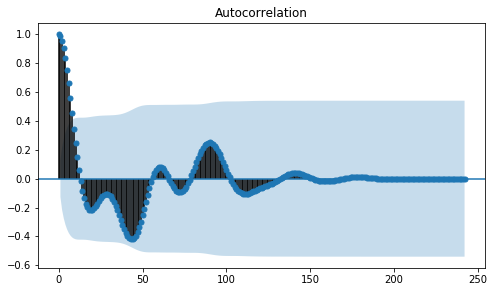

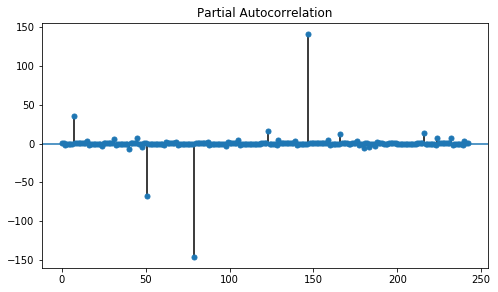

In [611]:
#Differencing once wasn't enough, used Differencing x2 function
stationary2(Phoenix2)

In [ ]:
##############################
##### Build ARIMA Models #####
##############################

In [94]:
#Functions for parameter tuning
import warnings
import numpy
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import boxcox

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
    
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(diff2, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
        
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float64')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [120]:
# Forecast Function for Q1 2014
def TSForecast(X, pdq, PlotTitle):
    X = X.values
    X = X.astype('float32')
    size = len(X) - 56 #Subtract 56 months from length of dataset (January 2014)
    train, test = X[0:size], X[size:]
    model = ARIMA(train, order=pdq)
    model_fit = model.fit(disp=False)
    model_fit.plot_predict(len(train)-56, len(train)+3)
    pyplot.title(PlotTitle)
    pyplot.xlabel('Months past April 1996')
    pyplot.ylabel('Price')
    pyplot.show()
    
    size1 = len(X) - 55 #Subtract 55 months from length of dataset (February 2014)
    train, test = X[0:size1], X[size1:]
    model = ARIMA(train, order=pdq)
    model_fit1 = model.fit(disp=False)
    
    size2 = len(X) - 54 #Subtract 54 months from length of dataset (March 2014)
    train, test = X[0:size2], X[size2:]
    model = ARIMA(train, order=pdq)
    model_fit2 = model.fit(disp=False)
    
    forecast, stderr, conf = model_fit.forecast()
    print('January 2014 Forecast:')
    print('Expected: %.3f' % test[0])
    print('Forecast: %.3f' % forecast)
    print('Standard Error: %.3f' % stderr)
    print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))
    print('')
    
    forecast, stderr, conf = model_fit1.forecast()
    print('February 2014 Forecast:')
    print('Expected: %.3f' % test[1])
    print('Forecast: %.3f' % forecast)
    print('Standard Error: %.3f' % stderr)
    print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))
    print('')
    
    forecast, stderr, conf = model_fit2.forecast()
    print('March 2014 Forecast:')
    print('Expected: %.3f' % test[2])
    print('Forecast: %.3f' % forecast)
    print('Standard Error: %.3f' % stderr)
    print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

In [118]:
#Parameter tuning for Sacramento1 ARIMA model
#p_values = range(0, 4)
#d_values = range(2, 3)
#q_values = range(0, 4)
#warnings.filterwarnings("ignore")
#evaluate_models(Sacramento1.values, p_values, d_values, q_values)

#Best ARIMA (0,2,2) RMSE = 18757.133

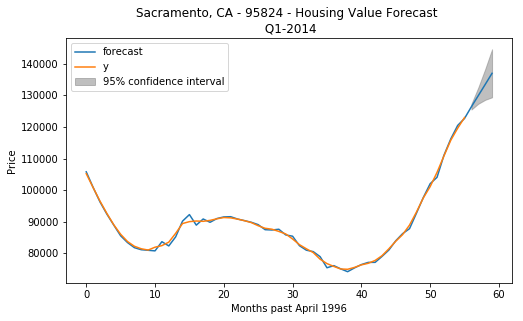

January 2014 Forecast:
Expected: 131300.000
Forecast: 126426.768
Standard Error: 456.238
95% Confidence Interval: 125532.557 to 127320.978

February 2014 Forecast:
Expected: 133200.000
Forecast: 128246.910
Standard Error: 457.186
95% Confidence Interval: 127350.842 to 129142.979

March 2014 Forecast:
Expected: 133900.000
Forecast: 131250.692
Standard Error: 456.434
95% Confidence Interval: 130356.098 to 132145.286


In [121]:
TSForecast(Sacramento1, (0,2,2), 'Sacramento, CA - 95824 - Housing Value Forecast \n Q1-2014')

In [819]:
#Parameter tuning for Sacramento2 ARIMA model
#p_values = range(0, 4)
#d_values = range(2, 3)
#q_values = range(0, 4)
#warnings.filterwarnings("ignore")
#evaluate_models(Sacramento2.values, p_values, d_values, q_values)

#Best ARIMA (0,2,2) RMSE = 22660.138

ARIMA(0, 2, 0) RMSE=24616.970
ARIMA(0, 2, 1) RMSE=23207.388
ARIMA(0, 2, 2) RMSE=22660.138
ARIMA(1, 2, 0) RMSE=23929.382
ARIMA(1, 2, 1) RMSE=23143.978
ARIMA(2, 2, 0) RMSE=23614.413
ARIMA(2, 2, 1) RMSE=23116.995
ARIMA(2, 2, 2) RMSE=23479.904
ARIMA(2, 2, 3) RMSE=23481.903
ARIMA(3, 2, 0) RMSE=23368.954
ARIMA(3, 2, 1) RMSE=23046.689
ARIMA(3, 2, 2) RMSE=23121.665
ARIMA(3, 2, 3) RMSE=23178.215
Best ARIMA(0, 2, 2) RMSE=22660.138


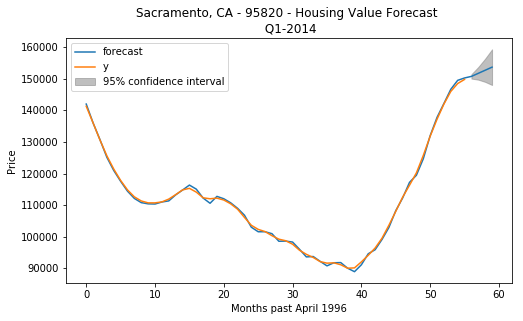

January 2014 Forecast:
Expected: 153400.000
Forecast: 150765.623
Standard Error: 353.107
95% Confidence Interval: 150073.546 to 151457.699

February 2014 Forecast:
Expected: 154800.000
Forecast: 152103.815
Standard Error: 352.387
95% Confidence Interval: 151413.149 to 152794.481

March 2014 Forecast:
Expected: 155500.000
Forecast: 153303.249
Standard Error: 351.551
95% Confidence Interval: 152614.221 to 153992.276


In [823]:
TSForecast(Sacramento2, (0,2,1), 'Sacramento, CA - 95820 - Housing Value Forecast \n Q1-2014')

In [824]:
#Parameter tuning for Seattle1 ARIMA model
#p_values = range(0, 8)
#d_values = range(2, 3)
#q_values = range(0, 8)
#warnings.filterwarnings("ignore")
#evaluate_models(Seattle1.values, p_values, d_values, q_values)

#Best ARIMA (0,0,1) RMSE = 24999.044

ARIMA(0, 2, 0) RMSE=33052.741
ARIMA(0, 2, 1) RMSE=31686.459
ARIMA(0, 2, 2) RMSE=31146.779
ARIMA(1, 2, 0) RMSE=32389.738
ARIMA(1, 2, 1) RMSE=31624.257
ARIMA(1, 2, 5) RMSE=31858.098
ARIMA(1, 2, 7) RMSE=32604.760
ARIMA(2, 2, 0) RMSE=32083.972
ARIMA(2, 2, 1) RMSE=31597.764
ARIMA(2, 2, 2) RMSE=31952.926
ARIMA(2, 2, 3) RMSE=31954.875
ARIMA(3, 2, 0) RMSE=31844.600
ARIMA(3, 2, 1) RMSE=31528.664
ARIMA(3, 2, 2) RMSE=31602.350
ARIMA(3, 2, 3) RMSE=31657.852
ARIMA(3, 2, 4) RMSE=43030.372
ARIMA(3, 2, 6) RMSE=31505.403
ARIMA(3, 2, 7) RMSE=32932.308
ARIMA(4, 2, 0) RMSE=31203.513
ARIMA(4, 2, 1) RMSE=31224.161
ARIMA(4, 2, 2) RMSE=31670.710
ARIMA(4, 2, 3) RMSE=31319.158
ARIMA(4, 2, 4) RMSE=31434.138
ARIMA(4, 2, 6) RMSE=32401.529
ARIMA(5, 2, 0) RMSE=31270.615
ARIMA(5, 2, 1) RMSE=31324.401
ARIMA(5, 2, 2) RMSE=31084.133
ARIMA(5, 2, 3) RMSE=31425.276
ARIMA(5, 2, 4) RMSE=32013.264
ARIMA(5, 2, 7) RMSE=31988.499
ARIMA(6, 2, 0) RMSE=31372.888
ARIMA(6, 2, 1) RMSE=31424.059
ARIMA(6, 2, 2) RMSE=31734.961
ARIMA(6, 2

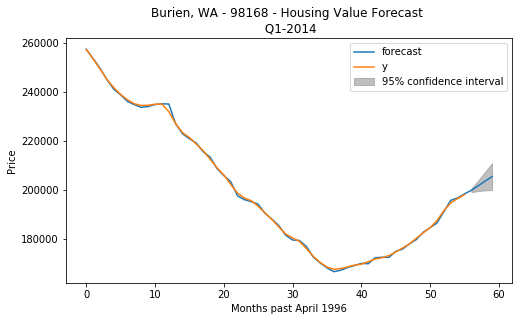

January 2014 Forecast:
Expected: 201900.000
Forecast: 199876.502
Standard Error: 392.695
95% Confidence Interval: 199106.833 to 200646.170

February 2014 Forecast:
Expected: 203200.000
Forecast: 201770.246
Standard Error: 391.767
95% Confidence Interval: 201002.398 to 202538.095

March 2014 Forecast:
Expected: 206000.000
Forecast: 201982.464
Standard Error: 393.446
95% Confidence Interval: 201211.325 to 202753.604


In [825]:
TSForecast(Seattle1, (5,2,2), 'Burien, WA - 98168 - Housing Value Forecast \n Q1-2014')

In [826]:
##Parameter tuning for Seattle2 ARIMA model
#p_values = range(0, 6)
#d_values = range(2, 3)
#q_values = range(0, 6)
#warnings.filterwarnings("ignore")
#evaluate_models(Seattle2.values, p_values, d_values, q_values)

#Best ARIMA (0,0,1) RMSE = 24999.044

ARIMA(0, 2, 0) RMSE=46353.086
ARIMA(0, 2, 1) RMSE=44763.423
ARIMA(0, 2, 2) RMSE=44116.252
ARIMA(1, 2, 0) RMSE=45589.404
ARIMA(1, 2, 1) RMSE=44689.468
ARIMA(1, 2, 5) RMSE=44966.694
ARIMA(2, 2, 0) RMSE=45232.488
ARIMA(2, 2, 1) RMSE=44657.921
ARIMA(2, 2, 2) RMSE=45078.511
ARIMA(2, 2, 3) RMSE=45080.806
ARIMA(3, 2, 0) RMSE=44950.750
ARIMA(3, 2, 1) RMSE=44575.502
ARIMA(3, 2, 2) RMSE=44663.384
ARIMA(3, 2, 3) RMSE=44729.430
ARIMA(3, 2, 4) RMSE=56998.356
ARIMA(4, 2, 0) RMSE=44184.900
ARIMA(4, 2, 1) RMSE=44209.846
ARIMA(4, 2, 2) RMSE=44744.713
ARIMA(4, 2, 3) RMSE=44324.365
ARIMA(4, 2, 4) RMSE=44462.430
ARIMA(5, 2, 0) RMSE=44265.898
ARIMA(5, 2, 1) RMSE=44330.674
ARIMA(5, 2, 2) RMSE=44040.273
ARIMA(5, 2, 3) RMSE=44451.810
ARIMA(5, 2, 4) RMSE=45149.485
Best ARIMA(5, 2, 2) RMSE=44040.273


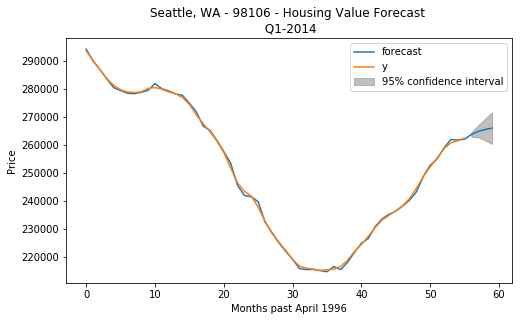

January 2014 Forecast:
Expected: 266700.000
Forecast: 263749.004
Standard Error: 410.337
95% Confidence Interval: 262944.758 to 264553.249

February 2014 Forecast:
Expected: 269300.000
Forecast: 264493.247
Standard Error: 409.466
95% Confidence Interval: 263690.708 to 265295.785

March 2014 Forecast:
Expected: 271700.000
Forecast: 265414.330
Standard Error: 408.765
95% Confidence Interval: 264613.164 to 266215.496


In [827]:
TSForecast(Seattle2, (5,2,2), 'Seattle, WA - 98106 - Housing Value Forecast \n Q1-2014')

In [828]:
#Parameter tuning for Phoenix1 ARIMA model
p_values = range(0, 6)
d_values = range(2, 3)
q_values = range(0, 6)
warnings.filterwarnings("ignore")
evaluate_models(Phoenix1.values, p_values, d_values, q_values)

#Best ARIMA (0,0,1) RMSE = 24999.044

ARIMA(0, 2, 0) RMSE=17550.664
ARIMA(0, 2, 1) RMSE=15869.321
ARIMA(0, 2, 2) RMSE=15212.914
ARIMA(1, 2, 0) RMSE=16732.730
ARIMA(1, 2, 1) RMSE=15793.322
ARIMA(1, 2, 5) RMSE=16079.399
ARIMA(2, 2, 0) RMSE=16356.560
ARIMA(2, 2, 1) RMSE=15760.975
ARIMA(2, 2, 2) RMSE=16195.669
ARIMA(2, 2, 3) RMSE=16198.061
ARIMA(3, 2, 0) RMSE=16062.860
ARIMA(3, 2, 1) RMSE=15676.679
ARIMA(3, 2, 2) RMSE=15766.574
ARIMA(3, 2, 3) RMSE=15834.359
ARIMA(3, 2, 4) RMSE=29530.156
ARIMA(4, 2, 0) RMSE=15281.559
ARIMA(4, 2, 1) RMSE=15306.565
ARIMA(4, 2, 2) RMSE=15850.072
ARIMA(4, 2, 3) RMSE=15421.773
ARIMA(4, 2, 4) RMSE=15561.537
ARIMA(5, 2, 0) RMSE=15362.871
ARIMA(5, 2, 1) RMSE=15428.139
ARIMA(5, 2, 2) RMSE=15137.233
ARIMA(5, 2, 3) RMSE=15550.754
ARIMA(5, 2, 4) RMSE=16269.720
Best ARIMA(5, 2, 2) RMSE=15137.233


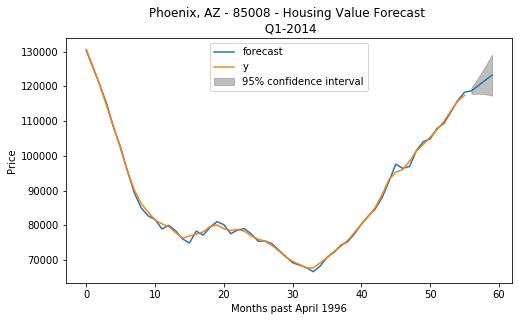

January 2014 Forecast:
Expected: 121700.000
Forecast: 118732.723
Standard Error: 446.690
95% Confidence Interval: 117857.228 to 119608.219

February 2014 Forecast:
Expected: 122100.000
Forecast: 120645.562
Standard Error: 445.773
95% Confidence Interval: 119771.862 to 121519.261

March 2014 Forecast:
Expected: 123100.000
Forecast: 121772.236
Standard Error: 445.036
95% Confidence Interval: 120899.980 to 122644.491


In [834]:
TSForecast(Phoenix1, (0,2,2), 'Phoenix, AZ - 85008 - Housing Value Forecast \n Q1-2014')

In [835]:
#Parameter tuning for Phoenix2 ARIMA model
p_values = range(0, 6)
d_values = range(2, 3)
q_values = range(0, 6)
warnings.filterwarnings("ignore")
evaluate_models(Phoenix2.values, p_values, d_values, q_values)

#Best ARIMA (0,0,1) RMSE = 24999.044

ARIMA(0, 2, 0) RMSE=14972.914
ARIMA(0, 2, 1) RMSE=13624.152
ARIMA(0, 2, 2) RMSE=13137.427
ARIMA(1, 2, 0) RMSE=14301.344
ARIMA(1, 2, 1) RMSE=13566.420
ARIMA(1, 2, 5) RMSE=13785.430
ARIMA(2, 2, 0) RMSE=14001.784
ARIMA(2, 2, 1) RMSE=13541.951
ARIMA(2, 2, 2) RMSE=13875.715
ARIMA(2, 2, 3) RMSE=13877.580
ARIMA(3, 2, 0) RMSE=13772.646
ARIMA(3, 2, 1) RMSE=13478.477
ARIMA(3, 2, 2) RMSE=13546.181
ARIMA(3, 2, 3) RMSE=13597.552
ARIMA(3, 2, 4) RMSE=26107.924
ARIMA(4, 2, 0) RMSE=13186.985
ARIMA(4, 2, 1) RMSE=13205.122
ARIMA(4, 2, 2) RMSE=13609.498
ARIMA(4, 2, 3) RMSE=13289.240
ARIMA(4, 2, 4) RMSE=13392.483
ARIMA(5, 2, 0) RMSE=13246.119
ARIMA(5, 2, 1) RMSE=13293.915
ARIMA(5, 2, 2) RMSE=13083.187
ARIMA(5, 2, 3) RMSE=13384.472
ARIMA(5, 2, 4) RMSE=13933.578
Best ARIMA(5, 2, 2) RMSE=13083.187


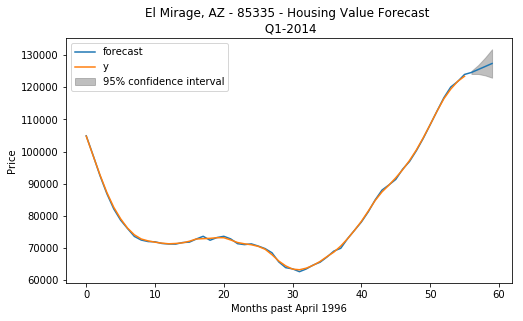

January 2014 Forecast:
Expected: 126500.000
Forecast: 124678.386
Standard Error: 240.317
95% Confidence Interval: 124207.373 to 125149.399

February 2014 Forecast:
Expected: 127100.000
Forecast: 125107.432
Standard Error: 240.044
95% Confidence Interval: 124636.954 to 125577.910

March 2014 Forecast:
Expected: 127400.000
Forecast: 126461.294
Standard Error: 240.304
95% Confidence Interval: 125990.308 to 126932.281


In [838]:
TSForecast(Phoenix2, (0,2,2), 'El Mirage, AZ - 85335 - Housing Value Forecast \n Q1-2014')

In [ ]:

#Sacramento = 95824 (Sacramento); #95820 (Sacramento)
#Seattle = 98168 (Burien); 98106 (Seattle)
#Phoenix = 85008 (Phoenix); 85335 (El Mirage)
